In [62]:
import torch
from torchvision import transforms
from PIL import Image

In [63]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [64]:
Efficientformer_model = torch.load('new_model/model.pth')
Efficientformer_model.to(device)

EfficientFormer(
  (patch_embed): Sequential(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): SyncBatchNorm(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(24, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): SyncBatchNorm(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (network): ModuleList(
    (0): Sequential(
      (0): Meta4D(
        (token_mixer): Pooling(
          (pool): AvgPool2d(kernel_size=3, stride=1, padding=1)
        )
        (mlp): Mlp(
          (fc1): Conv2d(48, 192, kernel_size=(1, 1), stride=(1, 1))
          (act): GELU(approximate='none')
          (fc2): Conv2d(192, 48, kernel_size=(1, 1), stride=(1, 1))
          (drop): Dropout(p=0.0, inplace=False)
          (norm1): SyncBatchNorm(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (norm2): SyncBatchNorm(48, eps=1e-05, momentum=0.1, affine

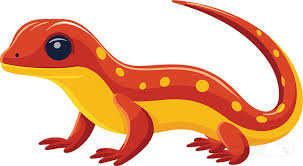

In [65]:
image = Image.open('teja/salmandar_animated.jpeg')
image

In [66]:
width, height = image.size
size = int((256 / 224) * width)
print(size)

346


In [67]:

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


In [68]:
input_image = transform(image).unsqueeze(0).to(device)

In [69]:
input_image.size()

torch.Size([1, 3, 224, 224])

In [70]:
with torch.no_grad():
    output = Efficientformer_model(input_image)

In [71]:
input_image.shape

torch.Size([1, 3, 224, 224])

In [72]:
output

tensor([[ 1.5429, -0.1390, -0.2823]], device='cuda:0')

In [73]:
from transformers import AutoImageProcessor, MobileNetV2ForImageClassification
image_processor = AutoImageProcessor.from_pretrained("google/mobilenet_v2_1.0_224")
model = MobileNetV2ForImageClassification.from_pretrained("google/mobilenet_v2_1.0_224")
inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

hook, claw
